# Artifact Detection and Visualization

Detect phase-based artifacts using `detect_phase_artifacts` and
visualize them on the phase time series with `plot_artifacts`.
Artifacts are flagged by two criteria from Wolpert et al. (2020):
non-monotonic phase and duration outliers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gastropy as gp

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

In [2]:
# Load data, select best channel, extract phase
egg = gp.load_egg()
best_idx, _, _, _ = gp.select_best_channel(egg["signal"], egg["sfreq"])
signals_df, info = gp.egg_process(egg["signal"][best_idx], egg["sfreq"])

phase = signals_df["phase"].values
times = np.arange(len(phase)) / egg["sfreq"]

## Detect Artifacts

The default `sd_threshold=3.0` flags cycles with duration more than
3 SD from the mean.

In [3]:
artifact_info = gp.detect_phase_artifacts(phase, times, sd_threshold=3.0)

print(f"Non-monotonic cycles: {len(artifact_info['nonmonotonic_cycles'])}")
print(f"Duration outliers:    {len(artifact_info['duration_outlier_cycles'])}")
print(f"Total artifacts:      {artifact_info['n_artifacts']}")

Non-monotonic cycles: 3
Duration outliers:    2
Total artifacts:      3


## Plot Artifacts

Artifact cycles are shaded in red on the phase time series.

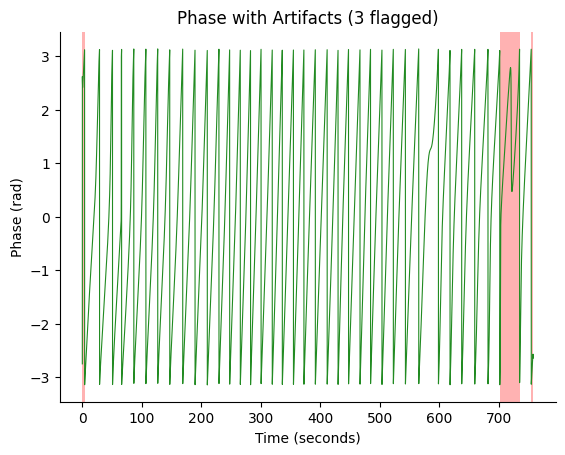

In [4]:
fig, ax = gp.plot_artifacts(phase, times, artifact_info)
plt.show()

## Stricter Threshold

Use a lower `sd_threshold` to be more aggressive about flagging
duration outliers.

Artifacts (3 SD): 3
Artifacts (2 SD): 4


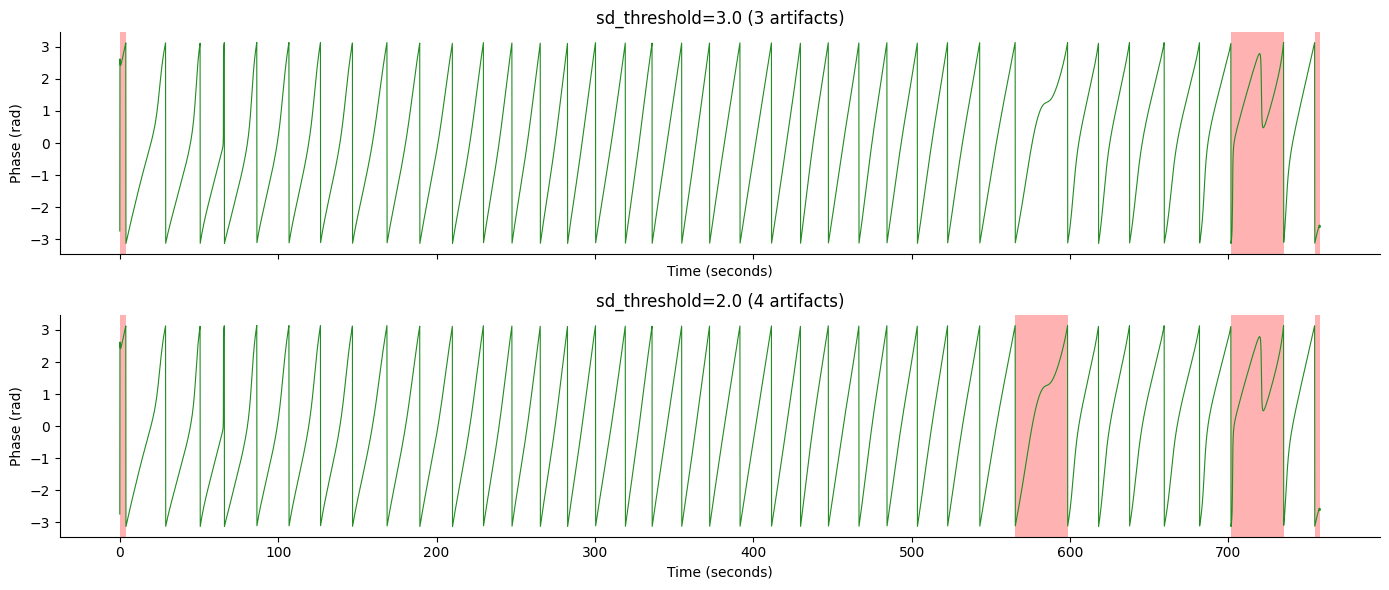

In [5]:
strict_info = gp.detect_phase_artifacts(phase, times, sd_threshold=2.0)
print(f"Artifacts (3 SD): {artifact_info['n_artifacts']}")
print(f"Artifacts (2 SD): {strict_info['n_artifacts']}")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
gp.plot_artifacts(phase, times, artifact_info, ax=ax1)
ax1.set_title(f"sd_threshold=3.0 ({artifact_info['n_artifacts']} artifacts)")
gp.plot_artifacts(phase, times, strict_info, ax=ax2)
ax2.set_title(f"sd_threshold=2.0 ({strict_info['n_artifacts']} artifacts)")
fig.tight_layout()
plt.show()

**See also:** [Comprehensive Figure](plot_egg_comprehensive.ipynb),
[Quality Assessment](quality_assessment.ipynb)